In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve

# Suppress all warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
data = pd.read_csv('/content/heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
data.shape

(1025, 14)

In [ ]:
# checking for missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# statistical measures about the data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# checking the distribution of target variable
data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Exploratory Data Analysis

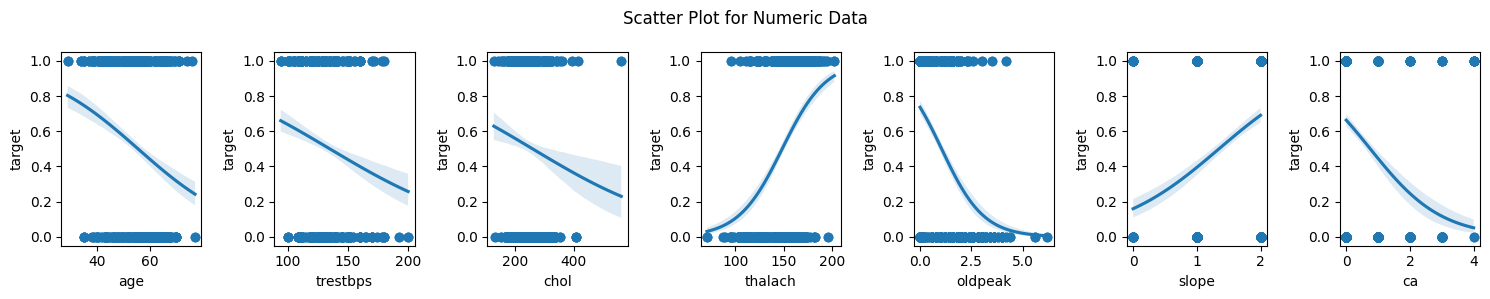

In [ ]:
fig, axes = plt.subplots(1,7, figsize=(15,3), sharey= False)
plt.suptitle("Scatter Plot for Numeric Data")
#plt.subplots_adjust(hspace=0.5)

axes = axes.flatten()
numeric_columns = ['age','trestbps','chol','thalach','oldpeak','slope','ca']

for i, column in enumerate(numeric_columns):
    sns.regplot(x=column, y='target',data=data, logistic = True, ax=axes[i])

plt.tight_layout()

===== Skewness =====
age = -0.24886590174584555
trestbps = 0.739768226050074
chol = 1.0740727783354815
thalach = -0.5137771771417209
oldpeak = 1.2108993882065326
slope = -0.4791344197425813
ca = 1.2611886429097716


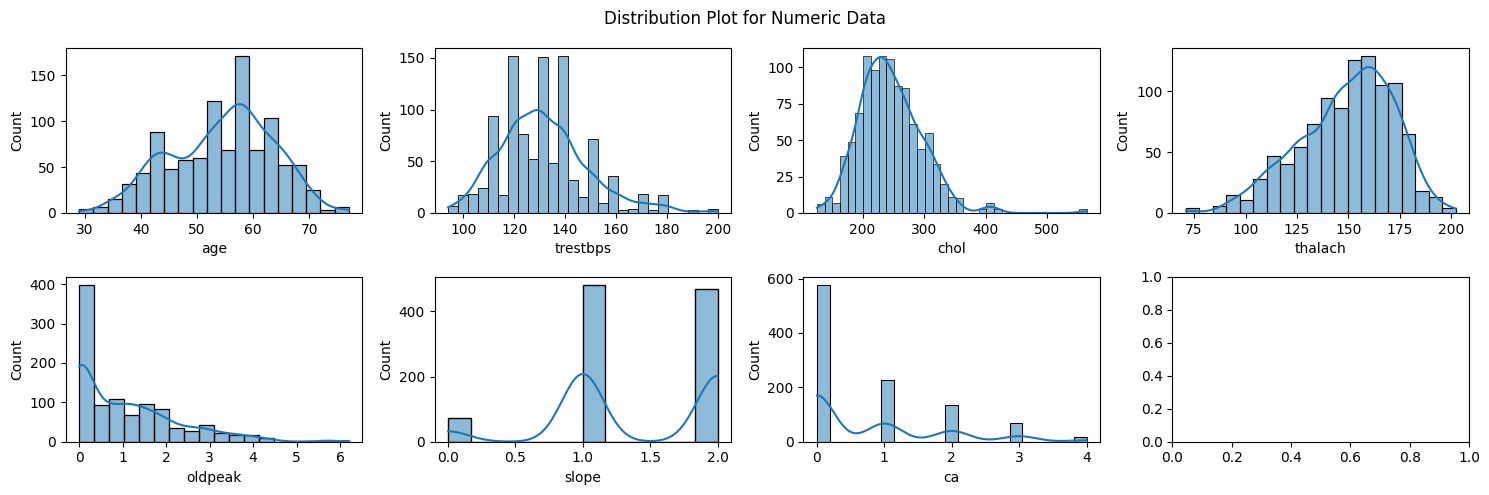

In [ ]:
fig, axes = plt.subplots(2,4, figsize=(15,5), sharey= False)
plt.suptitle("Distribution Plot for Numeric Data")
#plt.subplots_adjust(hspace=0.5)

axes = axes.flatten()
skewness = data[numeric_columns].skew()

for i, column in enumerate(numeric_columns):
    sns.histplot(x=column, data=data, ax=axes[i], kde=True)

print("===== Skewness =====")
for column, skew in zip(numeric_columns, skewness):
    print(f'{column} = {skew}')


plt.tight_layout()

In [ ]:
def remove_outliers_iqr(df, column_name, lower_bound_factor=1.5, upper_bound_factor=1.5):
    """
    Remove outliers from a numerical column in a DataFrame using the Interquartile Range (IQR) method.

    Parameters:
    - df (DataFrame): Input DataFrame containing the data.
    - column_name (str): Name of the column from which outliers are to be removed.
    - lower_bound_factor (float): Multiplier to determine the lower bound. Default is 1.5.
    - upper_bound_factor (float): Multiplier to determine the upper bound. Default is 1.5.

    Returns:
    - DataFrame: DataFrame with outliers removed.
    """
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - lower_bound_factor * IQR
    upper_bound = Q3 + upper_bound_factor * IQR


    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df_filtered

In [ ]:
numeric_columns = ['age','trestbps','chol','thalach','oldpeak','slope','ca']
data_no_outlier = data.copy()

for column in numeric_columns:
    data_no_outlier = remove_outliers_iqr(data_no_outlier,column)

data_no_outlier.reset_index(inplace=True, drop=True)
data_no_outlier.shape

(888, 14)

===== Skewness =====
age = -0.22102132154526366
trestbps = 0.27713671495782916
chol = 0.24990555821955063
thalach = -0.5127859871593993
oldpeak = 0.9146646691808222
slope = -0.5345806836454763
ca = 1.0034187332250104


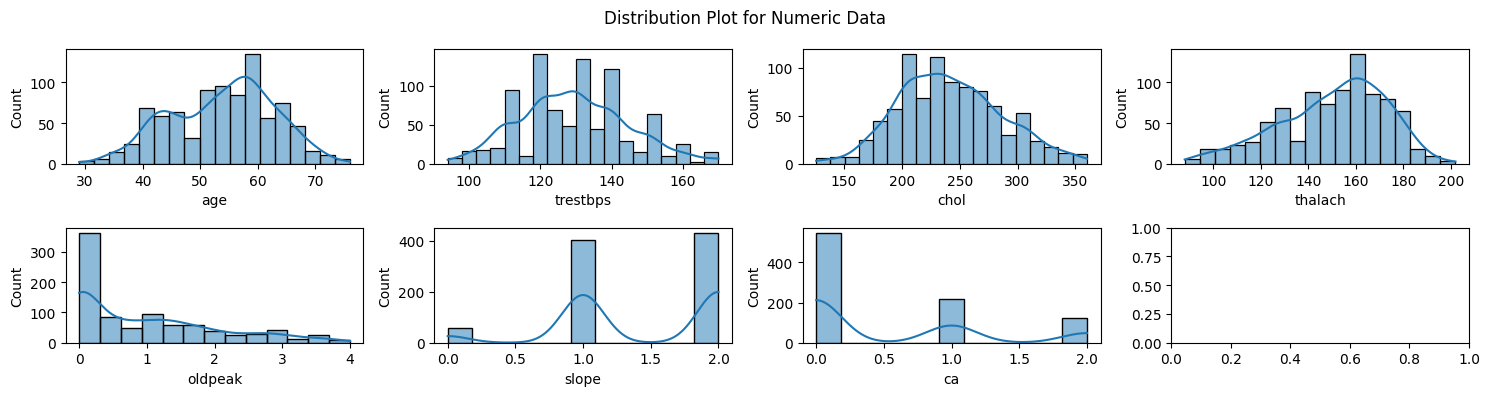

In [ ]:
fig, axes = plt.subplots(2,4, figsize=(15,4), sharey= False)
plt.suptitle("Distribution Plot for Numeric Data")
#plt.subplots_adjust(hspace=0.5)

axes = axes.flatten()
skewness = data_no_outlier[numeric_columns].skew()

for i, column in enumerate(numeric_columns):
    sns.histplot(x=column, data=data_no_outlier, ax=axes[i], kde=True)

print("===== Skewness =====")
for column, skew in zip(numeric_columns, skewness):
    print(f'{column} = {skew}')


plt.tight_layout()

Feature Scalling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numeric_df = data_no_outlier[numeric_columns]

numeric_scaled_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns = scaler.get_feature_names_out())

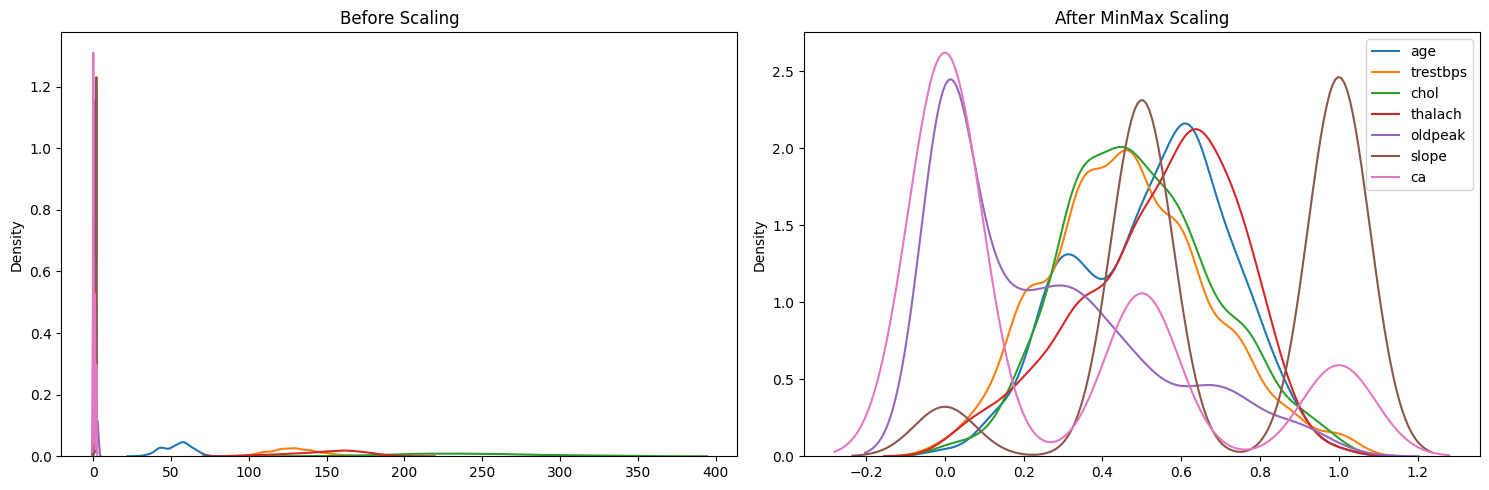

In [ ]:
plt.figure(figsize=(15,5))

# Plot Before Scalling
plt.subplot(121)
for column in numeric_columns:
    sns.distplot(data_no_outlier[column],hist = False)
plt.title('Before Scaling')
plt.xlabel('')

# Plot After Scalling
plt.subplot(122)
for column in numeric_columns:
    sns.distplot(numeric_scaled_df[column],hist = False)
plt.title('After MinMax Scaling')
plt.xlabel('')

plt.legend(numeric_columns)
plt.tight_layout()
plt.show()

In [ ]:
numeric_scaled_df

,age,trestbps,chol,thalach,oldpeak,slope,ca
0,0.489362,0.407895,0.367521,0.701754,0.250,1.0,1.0
1,0.510638,0.605263,0.329060,0.587719,0.775,0.0,0.0
2,0.872340,0.671053,0.205128,0.324561,0.650,0.0,0.0
3,0.680851,0.710526,0.329060,0.640351,0.000,1.0,0.5
4,0.617021,0.078947,0.521368,0.298246,0.250,0.5,0.0
...,...,...,...,...,...,...,...
883,0.638298,0.605263,0.405983,0.666667,0.000,1.0,0.0
884,0.659574,0.407895,0.564103,0.464912,0.700,0.5,0.5
885,0.382979,0.210526,0.636752,0.263158,0.250,0.5,0.5
886,0.446809,0.210526,0.547009,0.622807,0.000,1.0,0.0


In [ ]:
data2 = data_no_outlier
data2[numeric_columns] = numeric_scaled_df
data2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.489362,1,0,0.407895,0.367521,0,1,0.701754,0,0.250,1.0,1.0,3,0
1,0.510638,1,0,0.605263,0.329060,1,0,0.587719,1,0.775,0.0,0.0,3,0
2,0.872340,1,0,0.671053,0.205128,0,1,0.324561,1,0.650,0.0,0.0,3,0
3,0.680851,1,0,0.710526,0.329060,0,1,0.640351,0,0.000,1.0,0.5,3,0
4,0.617021,0,0,0.078947,0.521368,0,0,0.298246,0,0.250,0.5,0.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0.638298,1,1,0.605263,0.405983,0,1,0.666667,1,0.000,1.0,0.0,2,1
884,0.659574,1,0,0.407895,0.564103,0,0,0.464912,1,0.700,0.5,0.5,3,0
885,0.382979,1,0,0.210526,0.636752,0,0,0.263158,1,0.250,0.5,0.5,2,0
886,0.446809,0,0,0.210526,0.547009,0,0,0.622807,0,0.000,1.0,0.0,2,1


Feature Generation

In [ ]:
def assign_age_group(age):

    age_groups = {
    (0, 40): 'Young',
    (41, 60): 'Middle-aged',
    (61, 80): 'Elderly',
    (81, float('inf')): 'Very Elderly'
    }

    for age_range, group in age_groups.items():
        if age_range[0] <= age <= age_range[1]:
            return group


In [ ]:
data2['age_group'] = data['age'].apply(assign_age_group)
data2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,0.489362,1,0,0.407895,0.367521,0,1,0.701754,0,0.250,1.0,1.0,3,0,Middle-aged
1,0.510638,1,0,0.605263,0.329060,1,0,0.587719,1,0.775,0.0,0.0,3,0,Middle-aged
2,0.872340,1,0,0.671053,0.205128,0,1,0.324561,1,0.650,0.0,0.0,3,0,Elderly
3,0.680851,1,0,0.710526,0.329060,0,1,0.640351,0,0.000,1.0,0.5,3,0,Elderly
4,0.617021,0,0,0.078947,0.521368,0,0,0.298246,0,0.250,0.5,0.0,2,1,Elderly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0.638298,1,1,0.605263,0.405983,0,1,0.666667,1,0.000,1.0,0.0,2,1,Middle-aged
884,0.659574,1,0,0.407895,0.564103,0,0,0.464912,1,0.700,0.5,0.5,3,0,Elderly
885,0.382979,1,0,0.210526,0.636752,0,0,0.263158,1,0.250,0.5,0.5,2,0,Middle-aged
886,0.446809,0,0,0.210526,0.547009,0,0,0.622807,0,0.000,1.0,0.0,2,1,Elderly


In [ ]:
def categorize_blood_pressure(resting_blood_pressure):
    if resting_blood_pressure < 90:
        return "Low"
    elif 90 <= resting_blood_pressure <= 120:
        return "Normal"
    else:
        return "High"

In [ ]:
data2['blood_pressure_group'] = data['trestbps'].apply(categorize_blood_pressure)
data2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,blood_pressure_group
0,0.489362,1,0,0.407895,0.367521,0,1,0.701754,0,0.250,1.0,1.0,3,0,Middle-aged,High
1,0.510638,1,0,0.605263,0.329060,1,0,0.587719,1,0.775,0.0,0.0,3,0,Middle-aged,High
2,0.872340,1,0,0.671053,0.205128,0,1,0.324561,1,0.650,0.0,0.0,3,0,Elderly,High
3,0.680851,1,0,0.710526,0.329060,0,1,0.640351,0,0.000,1.0,0.5,3,0,Elderly,High
4,0.617021,0,0,0.078947,0.521368,0,0,0.298246,0,0.250,0.5,0.0,2,1,Elderly,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0.638298,1,1,0.605263,0.405983,0,1,0.666667,1,0.000,1.0,0.0,2,1,Middle-aged,High
884,0.659574,1,0,0.407895,0.564103,0,0,0.464912,1,0.700,0.5,0.5,3,0,Elderly,High
885,0.382979,1,0,0.210526,0.636752,0,0,0.263158,1,0.250,0.5,0.5,2,0,Middle-aged,High
886,0.446809,0,0,0.210526,0.547009,0,0,0.622807,0,0.000,1.0,0.0,2,1,Elderly,Normal


In [ ]:
def categorize_cholesterol(cholesterol):
    if cholesterol < 200:
        return "Desirable"
    elif 200 <= cholesterol <= 239:
        return "Borderline High"
    else:
        return "High"

In [ ]:
data2['cholestoral_group'] = data['chol'].apply(categorize_cholesterol)
data2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,blood_pressure_group,cholestoral_group
0,0.489362,1,0,0.407895,0.367521,0,1,0.701754,0,0.250,1.0,1.0,3,0,Middle-aged,High,Borderline High
1,0.510638,1,0,0.605263,0.329060,1,0,0.587719,1,0.775,0.0,0.0,3,0,Middle-aged,High,Borderline High
2,0.872340,1,0,0.671053,0.205128,0,1,0.324561,1,0.650,0.0,0.0,3,0,Elderly,High,Desirable
3,0.680851,1,0,0.710526,0.329060,0,1,0.640351,0,0.000,1.0,0.5,3,0,Elderly,High,Borderline High
4,0.617021,0,0,0.078947,0.521368,0,0,0.298246,0,0.250,0.5,0.0,2,1,Elderly,High,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0.638298,1,1,0.605263,0.405983,0,1,0.666667,1,0.000,1.0,0.0,2,1,Middle-aged,High,High
884,0.659574,1,0,0.407895,0.564103,0,0,0.464912,1,0.700,0.5,0.5,3,0,Elderly,High,Desirable
885,0.382979,1,0,0.210526,0.636752,0,0,0.263158,1,0.250,0.5,0.5,2,0,Middle-aged,High,High
886,0.446809,0,0,0.210526,0.547009,0,0,0.622807,0,0.000,1.0,0.0,2,1,Elderly,Normal,High


Handling Categorical Data

lets we classify the categorical into three type:

Nominal Features:

- cp / chest pain type : 4 values (0,1,2,3)
- restecg / resting electrocardiographic results : 3 values (0,1,2)
- Thal : 0 = normal, 1 = fixed defect, 2 = reversible defect

Ordinal Features:

- age_group : 0 = Young, 1 = Middle-aged, 2 = 'Elderly', 3 = 'Very Elderly'
- blood_pressure_group : 0 = Low, 1 = Normal, 2 = High
- categorize_cholesterol : 0 = Desirable, 1 = Borderline High, 2 = High

Binary

- Sex (1 = Male, 0 = Female)
- Fasting blood sugar > 120 mg/dl (True, False)
- Exercise induced angina (True, False)

The binary features already set to binary (0 and 1). For Nominal will be using OneHotEncoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

nominal_columns = ['cp','restecg','thal']
ohc = OneHotEncoder(sparse_output=False, drop='first')

dummies_df = pd.DataFrame(ohc.fit_transform(data2[nominal_columns]), columns = ohc.get_feature_names_out())
dummies_df

,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
883,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
885,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
886,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
age_group_mapping = {'Young': 0, 'Middle-aged': 1, 'Elderly': 2, 'Very Elderly' : 3}
bloodp_mapping = {'Low': 0, 'Normal': 1, 'High': 2}
chol_mapping = {'Desirable': 0, 'Borderline High': 1, 'High': 2}

# Create Ordinal Dataframe
ordinal_df = {
    'age_group' : data2['age_group'],
    'blood_pressure' : data2['blood_pressure_group'],
    'cholesterol_group' : data2['cholestoral_group']}
ordinal_df = pd.DataFrame(ordinal_df)

# Encode ordinal categories using the mappings
ordinal_df['age_group'] = ordinal_df['age_group'].map(age_group_mapping)
ordinal_df['blood_pressure'] = ordinal_df['blood_pressure'].map(bloodp_mapping)
ordinal_df['cholesterol_group'] = ordinal_df['cholesterol_group'].map(chol_mapping)
ordinal_df

,age_group,blood_pressure,cholesterol_group
0,1,2,1
1,1,2,1
2,2,2,0
3,2,2,1
4,2,2,2
...,...,...,...
883,1,2,2
884,2,2,0
885,1,2,2
886,2,1,2


Lets combining all the dataframe.

In [ ]:
last_data = pd.concat([numeric_scaled_df, dummies_df, ordinal_df, data2[['sex', 'fbs','exang','target']]], axis=1)
last_data

,age,trestbps,chol,thalach,oldpeak,slope,ca,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3,age_group,blood_pressure,cholesterol_group,sex,fbs,exang,target
0,0.489362,0.407895,0.367521,0.701754,0.250,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,2,1,1,0,0,0
1,0.510638,0.605263,0.329060,0.587719,0.775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,2,1,1,1,1,0
2,0.872340,0.671053,0.205128,0.324561,0.650,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2,2,0,1,0,1,0
3,0.680851,0.710526,0.329060,0.640351,0.000,1.0,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2,2,1,1,0,0,0
4,0.617021,0.078947,0.521368,0.298246,0.250,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,2,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0.638298,0.605263,0.405983,0.666667,0.000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,2,2,1,0,1,1
884,0.659574,0.407895,0.564103,0.464912,0.700,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2,0,1,0,1,0
885,0.382979,0.210526,0.636752,0.263158,0.250,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,2,2,1,0,1,0
886,0.446809,0.210526,0.547009,0.622807,0.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,1,2,0,0,0,1


Modelling

In [ ]:
from sklearn.model_selection import train_test_split

X = last_data.drop('target', axis=1)
y = last_data['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify=y, test_size=.3,
                                                   random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(621, 21) (267, 21)
(621,) (267,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

models = [
    LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), SVC(), XGBClassifier(), LGBMClassifier(verbose = -1)
]

acc_score = []
roc_score = []
f1 = []
name_model = []

for model in models :
  model.fit(X_train,y_train)
  y_pred =  model.predict(X_test)
  acc_score.append(accuracy_score(y_test, y_pred))
  roc_score.append(roc_auc_score(y_test, y_pred))
  f1.append(f1_score(y_test, y_pred, average='weighted'))
  name_model.append(type(model).__name__)

result = pd.DataFrame(
    {'Model Name' : name_model,
     'accuracy': acc_score,
     'roc auc' : roc_score,
     'f1-weighted' : f1}
)

result.sort_values('f1-weighted',ascending=False)

,Model Name,accuracy,roc auc,f1-weighted
2,RandomForestClassifier,0.988764,0.989726,0.988775
5,LGBMClassifier,0.988764,0.989726,0.988775
1,DecisionTreeClassifier,0.977528,0.979452,0.977564
4,XGBClassifier,0.977528,0.979452,0.977564
3,SVC,0.880150,0.879797,0.880228
0,LogisticRegression,0.850187,0.848155,0.850073


Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import make_scorer

def f1_weighted(y_actual, y_pred):
    return f1_score(y_actual, y_pred, average='weighted')

f1w_score = make_scorer(f1_weighted, greater_is_better=True)

def cross_val_model(X, y, models):

    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    results = []
    from sklearn.model_selection import cross_val_score, KFold
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import make_scorer

def f1_weighted(y_actual, y_pred):
    return f1_score(y_actual, y_pred, average='weighted')

f1w_score = make_scorer(f1_weighted, greater_is_better=True)

def cross_val_model(X, y, models):

    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    results = []

    for model in models:
        kfold = KFold(n_splits=5, shuffle=True, random_state=42)
        f1 = cross_val_score(model, X, y, cv=kfold, scoring=f1w_score, verbose=1)
        print(type(model).__name__)
        print(f"CV F1 scores: {np.round(f1,3)}")
        print(f"Mean CV F1: {f1.mean():.3f}")
        print(f"CV F1 STDEV: {f1.std():.3f}")
        print(f"CV F1 Deviation: {f1.max() - f1.min():.3f}")
        print('============================================================')


models = [
        LogisticRegression(), RandomForestClassifier(), XGBClassifier(), LGBMClassifier(verbose = -1), DecisionTreeClassifier(), SVC()
    ]

cross_val_model(X, y, models)

LogisticRegression
CV F1 scores: [0.859 0.836 0.831 0.837 0.898]
Mean CV F1: 0.852
CV F1 STDEV: 0.025
CV F1 Deviation: 0.066
RandomForestClassifier
CV F1 scores: [1.    1.    1.    0.966 0.994]
Mean CV F1: 0.992
CV F1 STDEV: 0.013
CV F1 Deviation: 0.034
XGBClassifier
CV F1 scores: [1.    1.    1.    0.972 1.   ]
Mean CV F1: 0.994
CV F1 STDEV: 0.011
CV F1 Deviation: 0.028
LGBMClassifier
CV F1 scores: [1.    1.    1.    0.983 1.   ]
Mean CV F1: 0.997
CV F1 STDEV: 0.007
CV F1 Deviation: 0.017
DecisionTreeClassifier
CV F1 scores: [1.    1.    1.    0.966 1.   ]
Mean CV F1: 0.993
CV F1 STDEV: 0.014
CV F1 Deviation: 0.034
SVC
CV F1 scores: [0.865 0.853 0.831 0.837 0.921]
Mean CV F1: 0.861
CV F1 STDEV: 0.032
CV F1 Deviation: 0.089


Looks like the Random Forest, XGBoost, LightGBM, and Decision Tree is overfitting because they get F1 score of 1 (it's imposible). Lets make learning curve plot to see if these models are really overfitting or not.

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("F1 Score")

    kfold = KFold(n_splits=cv, shuffle=True, random_state=42)

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=kfold, n_jobs=n_jobs, train_sizes=train_sizes, scoring=f1w_score)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

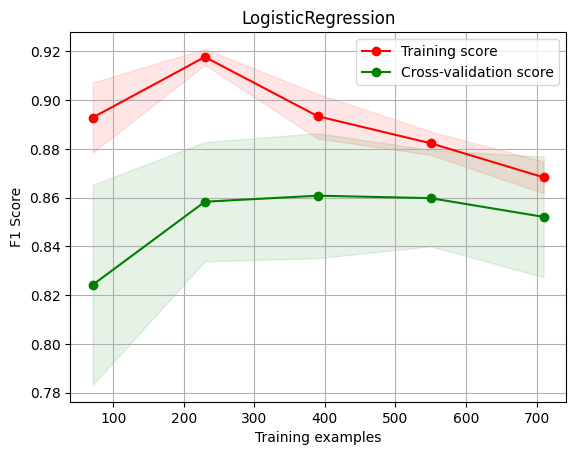

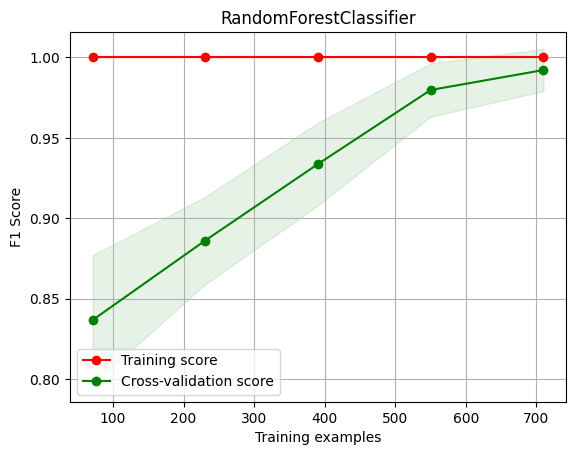

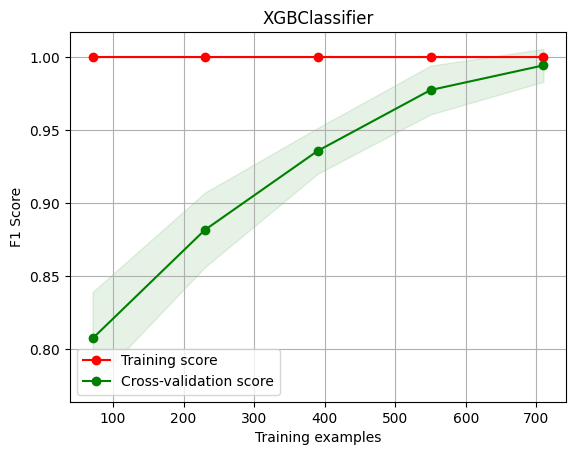

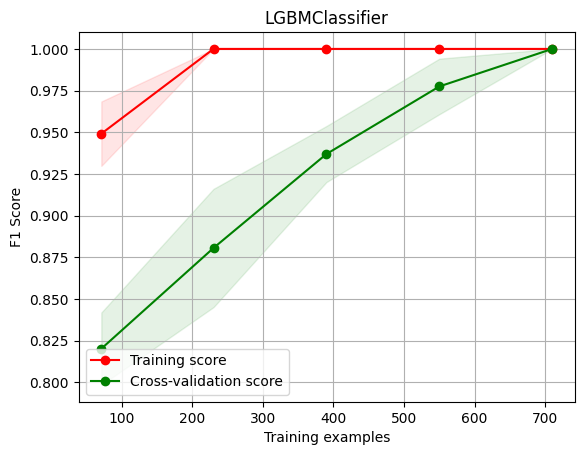

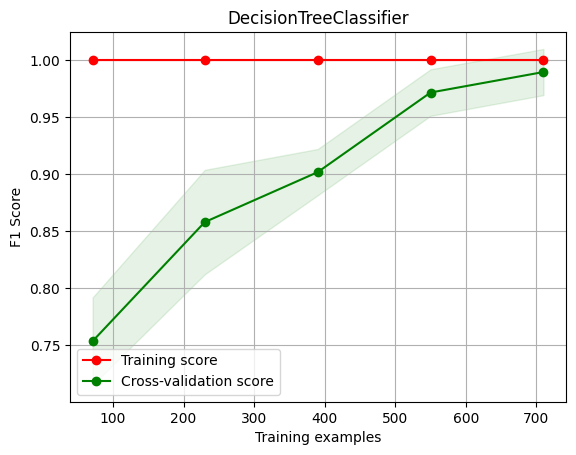

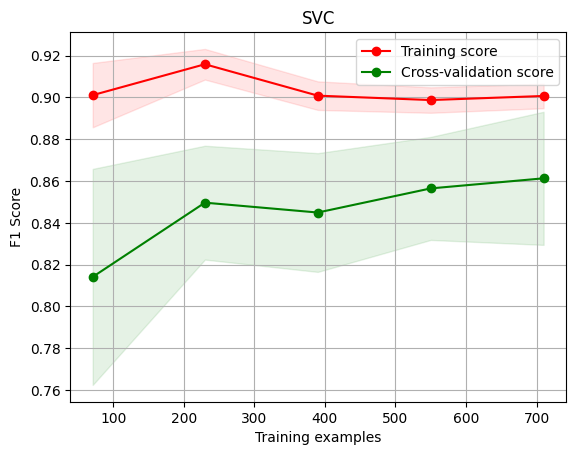

In [ ]:
models = [
        LogisticRegression(), RandomForestClassifier(), XGBClassifier(), LGBMClassifier(verbose = -1), DecisionTreeClassifier(), SVC()
    ]

for model in models:
    plot_learning_curve(model, type(model).__name__, X, y, cv = 5)

They are overfitting. So, we're gonna use Logistics Regression and SVC. Lets we tuning the hyperparameters of those both models.

Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
logistic = LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularisasi parameter
    'penalty': ['l1', 'l2'],  # Tipe regularisasi
    'solver': ['liblinear']  # Solver yang digunakan untuk penyelesaian
}

# Inisialisasi GridSearchCV
logistic_grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring=f1w_score, verbose=1)

logistic_grid_search.fit(X, y)

print("Best parameters found:")
print(logistic_grid_search.best_params_)

print("Best cross-validation F1 score: {:.2f}".format(logistic_grid_search.best_score_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found:
{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation F1 score: 0.86


In [ ]:
svc = SVC()

param_grid = {
    'C': [0.01, 0.05, 0.1, 1, 5, 10, 20],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' and 'poly'
}

svc_grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring=f1w_score, verbose=1)

# Perform grid search
svc_grid_search.fit(X, y)

# Print the best parameters found
print("Best parameters found:")
print(svc_grid_search.best_params_)

# Print the best score found
print("Best cross-validation F1 score: {:.2f}".format(svc_grid_search.best_score_))

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best parameters found:
{'C': 20, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation F1 score: 0.92


LogisticRegression
CV F1 scores: [0.87  0.848 0.859 0.842 0.898]
Mean CV F1: 0.863
CV F1 STDEV: 0.020
CV F1 Deviation: 0.056
SVC
CV F1 scores: [0.927 0.921 0.904 0.904 0.949]
Mean CV F1: 0.921
CV F1 STDEV: 0.017
CV F1 Deviation: 0.045


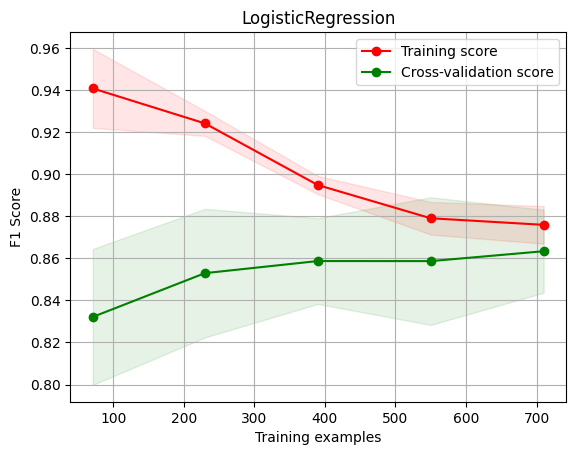

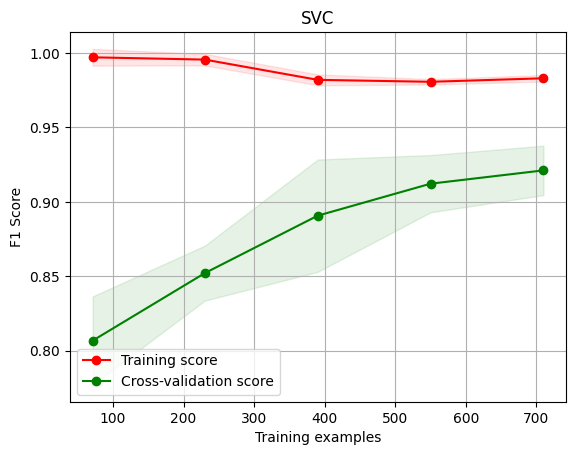

In [ ]:
models = [
        LogisticRegression(**logistic_grid_search.best_params_), SVC(**svc_grid_search.best_params_)
    ]

cross_val_model(X, y, models)

for model in models:
    plot_learning_curve(model, type(model).__name__, X, y, cv = 5)

The SVC has a significantly higher mean F1 score (0.921) compared to Logistic Regression (0.8634), indicating it performs better overall across the cross-validation folds. Additionally, the SVC has a lower standard deviation (0.0167) in its F1 scores compared to Logistic Regression (0.0198). This suggests the SVC's performance is more consistent across the folds, reducing the concern of overfitting.

In conclusion, based on the F1 scores, the SVC is the better model in this case. It demonstrates both a higher overall performance and more consistent performance across the data.

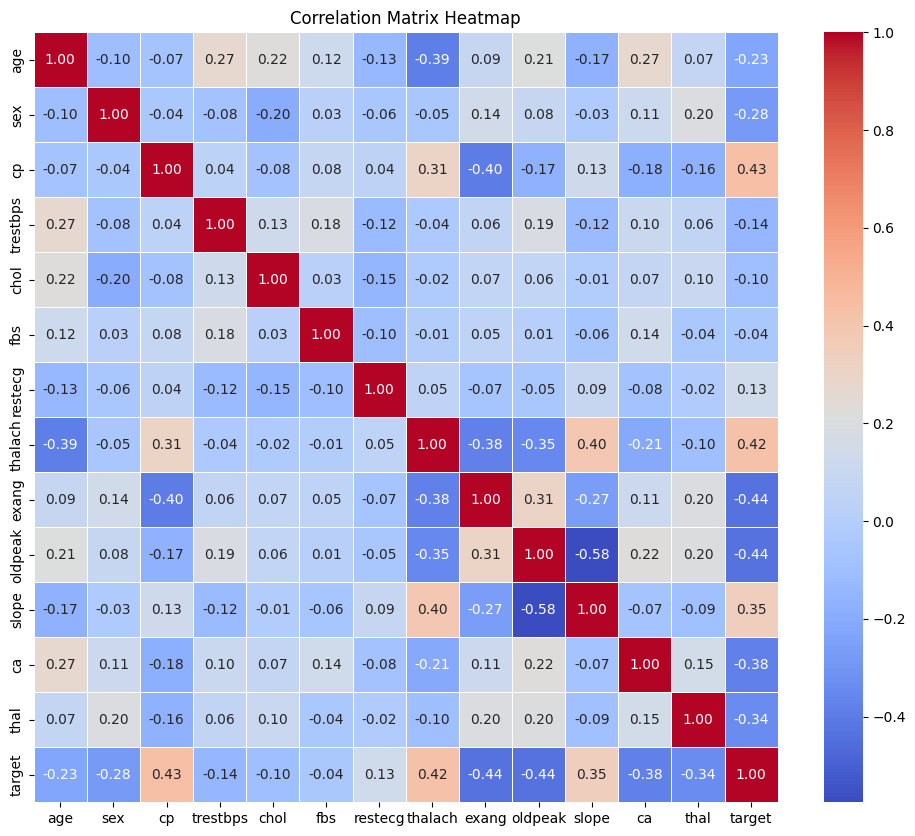

In [ ]:
# Generate correlation matrix
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
X = data.drop(columns='target', axis=1)
Y = data['target']

In [ ]:
print(X)
print(Y)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal
0      52    1   0       125   212    0        1      168      0      1.0      2   2     3
1      53    1   0       140   203    1        0      155      1      3.1      0   0     3
2      70    1   0       145   174    0        1      125      1      2.6      0   0     3
3      61    1   0       148   203    0        1      161      0      0.0      2   1     3
4      62    0   0       138   294    1        1      106      0      1.9      1   3     2
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...    ...  ..   ...
1020   59    1   1       140   221    0        1      164      1      0.0      2   0     2
1021   60    1   0       125   258    0        0      141      1      2.8      1   1     3
1022   47    1   0       110   275    0        0      118      1      1.0      1   1     2
1023   50    0   0       110   254    0        0      159      0      0.0      2   0     2

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify= Y, random_state=2)

In [ ]:
print(X.shape,Y.shape, X_test.shape)

(1025, 13) (1025,) (205, 13)


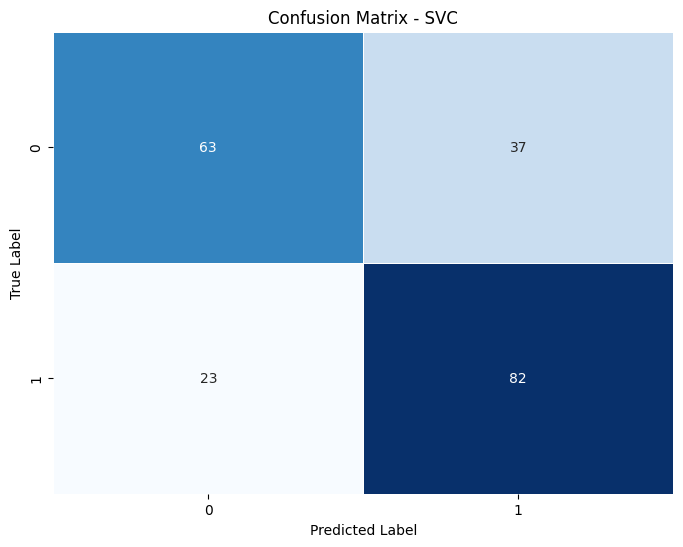

In [ ]:
from sklearn.svm import SVC  # Add this import statement

# Define the SVC model with default hyperparameters
default_svc_model = SVC()

# Train the SVC model on the entire dataset
default_svc_model.fit(X_train, Y_train)

# Predict on the test set
y_pred_svc = default_svc_model.predict(X_test)

# Generate confusion matrix
conf_matrix_svc = confusion_matrix(Y_test, y_pred_svc)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svc, annot=True, cmap="Blues", fmt="d", linewidths=0.5, cbar=False)
plt.title("Confusion Matrix - SVC")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the SVC model
model = SVC()

# Fit the SVC model on the training data
model.fit(X_train, Y_train)

# Predict on the training data
y_train_pred = model.predict(X_train)

# Calculate accuracy on the training data
train_accuracy = accuracy_score(Y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Predict on the testing data
y_test_pred = model.predict(X_test)

# Calculate accuracy on the testing data
test_accuracy = accuracy_score(Y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.7207317073170731
Testing Accuracy: 0.7073170731707317


In [ ]:
input_data = (41,0,1,130,204,0,0,172,0,1.4,2,0,2)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart DiseaseS')

[1]
The Person has Heart DiseaseS
